# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Jed Chen
**Email:** ejc9378@nyu.edu

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)

In [3]:
# 1) If we want a model that generalizes to new speakers, we would need to split by people so that no person appears in more than one split.
# Since there are 100 people, we can do a 80/10/10 split for training, validation, and testing respectively.

# 2) To maintain the generalization, we can do a separate split for Kilian, using the same 80/10/10 ratio for ONLY Kilian's dataset. 
# To train a model that performs well specifically for Kilian but still maintaining generalization, we could train the data from the split in question 1, 
# then train on Kilian's 80% to fine-tune, validate the model using both 10%'s, and finally test using both 10%'s for generalization and Kilian's
# speaker specific performance. 

### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Text(0.5, 1.0, 'k-NN Decision Boundary (k=1)')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

(0.0, 6.0)

(0.0, 6.0)

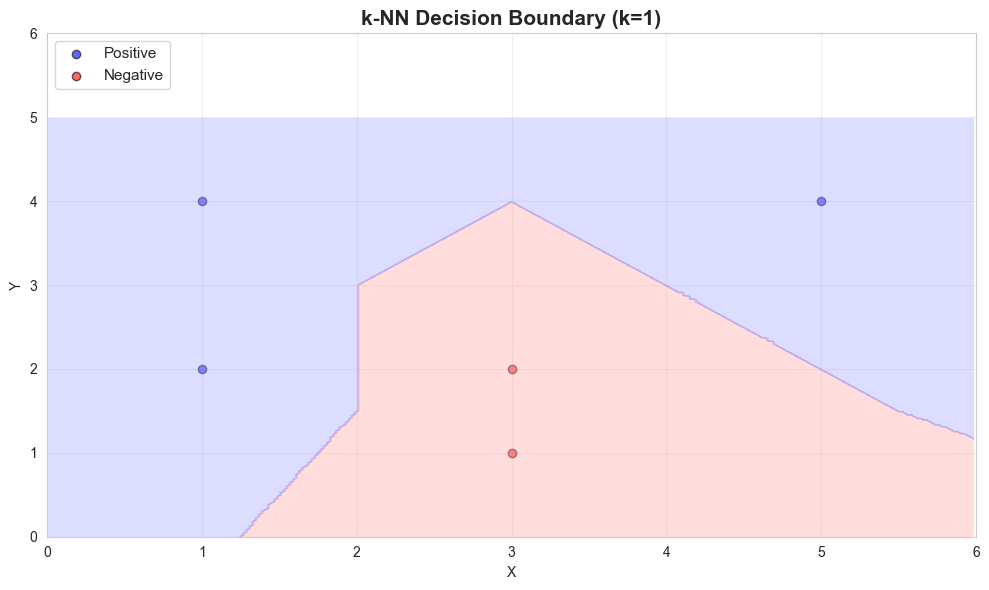

In [4]:
# 1)
from matplotlib.colors import ListedColormap

positive = np.array([(1, 2), (1, 4), (5, 4)])
negative = np.array([(3, 1), (3, 2)])

# Scatter plot
plt.scatter(positive[:, 0], positive[:, 1], 
            color='blue', label='Positive', edgecolors='black', alpha=0.6)
plt.scatter(negative[:, 0], negative[:, 1], 
            color='red', label='Negative', edgecolors='black', alpha=0.6)

# Combine into one dataset
X = np.vstack((positive, negative))
y = np.array([1, 1, 1, 0, 0])  # 1 = positive, 0 = negative

# Train k-NN (k=1)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Create Mesh Grid
h = 0.02  # step size for smooth boundary

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict on the Mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

plt.title("k-NN Decision Boundary (k=1)", 
             fontsize=15, fontweight='bold')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(0, 6)
plt.ylim(0, 6)

plt.tight_layout()
plt.show()


2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Text(0.5, 1.0, 'k-NN Decision Boundary (k=1)')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

(0.0, 600.0)

(0.0, 5.0)

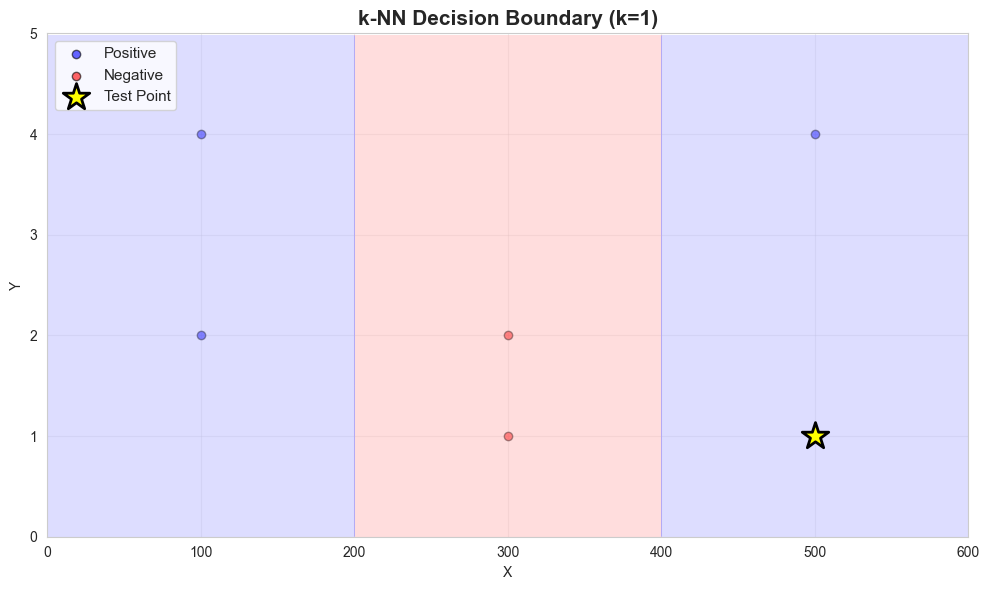

In [5]:
# 2) Before scaling: (500, 1) would be classified as positive

positive = np.array([(100, 2), (100, 4), (500, 4)])
negative = np.array([(300, 1), (300, 2)])
test_point = np.array([[500, 1]])

# Scatter plot
plt.scatter(positive[:, 0], positive[:, 1], 
            color='blue', label='Positive', edgecolors='black', alpha=0.6)
plt.scatter(negative[:, 0], negative[:, 1], 
            color='red', label='Negative', edgecolors='black', alpha=0.6)
plt.scatter(test_point[0, 0], test_point[0, 1], 
            c='yellow', s=400, marker='*', edgecolors='black', linewidths=2,
            label='Test Point', zorder=5)

# Combine into one dataset
X = np.vstack((positive, negative))
y = np.array([1, 1, 1, 0, 0])  # 1 = positive, 0 = negative

# Train k-NN (k=1)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Create Mesh Grid
h = 0.02  # step size for smooth boundary

x_min, x_max = X[:, 0].min() - 100, X[:, 0].max() + 100
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict on the Mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

plt.title("k-NN Decision Boundary (k=1)", 
             fontsize=15, fontweight='bold')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()



,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Text(0.5, 1.0, 'k-NN Decision Boundary (k=1)')

Text(0.5, 0, 'X')

Text(0, 0.5, 'Y')

(-0.1, 1.1)

(-0.1, 1.1)

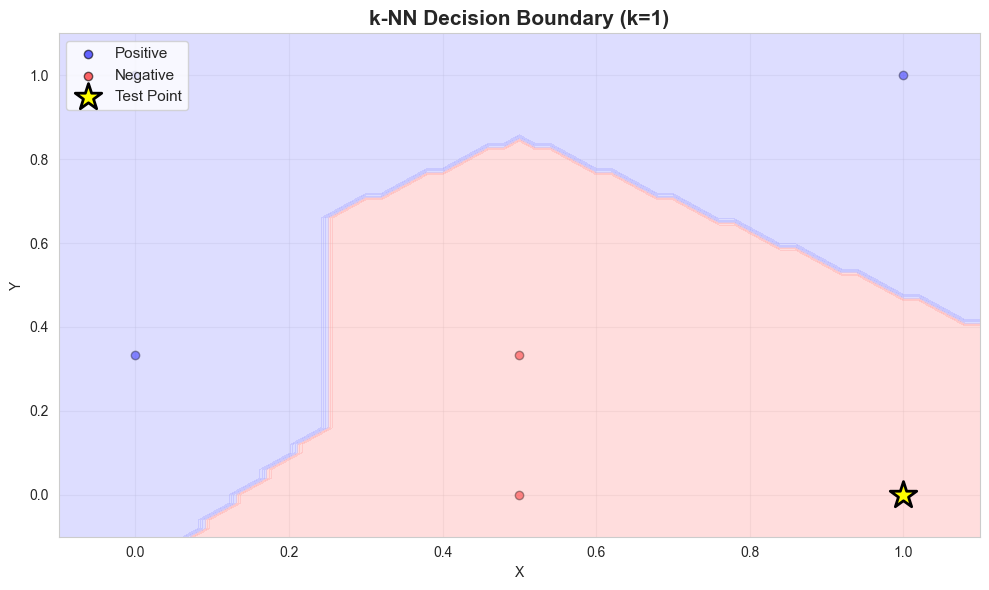

In [6]:
# 2) After scaling: (500, 1) would be classified as negative

positive = np.array([(100, 2), (100, 4), (500, 4)])
negative = np.array([(300, 1), (300, 2)])
test_point = np.array([[500, 1]])

combined = np.vstack((positive, negative, test_point))

def scale(X, ref):
    X = np.array(X, dtype=float)
    x_vals = X[:, 0]
    y_vals = X[:, 1]
    refx_vals = ref[:, 0]
    refy_vals = ref[:, 1]
    x_scaled = (x_vals - refx_vals.min()) / (refx_vals.max() - refx_vals.min())
    y_scaled = (y_vals - refy_vals.min()) / (refy_vals.max() - refy_vals.min())

    X_scaled = np.column_stack((x_scaled, y_scaled))
    return X_scaled

positive = scale(positive, combined)
negative = scale(negative, combined)
test_point = scale(test_point, combined)

# Scatter plot
plt.scatter(positive[:, 0], positive[:, 1], 
            color='blue', label='Positive', edgecolors='black', alpha=0.6)
plt.scatter(negative[:, 0], negative[:, 1], 
            color='red', label='Negative', edgecolors='black', alpha=0.6)
plt.scatter(test_point[0, 0], test_point[0, 1], 
            c='yellow', s=400, marker='*', edgecolors='black', linewidths=2,
            label='Test Point', zorder=5)

# Combine into one dataset
X = np.vstack((positive, negative))
y = np.array([1, 1, 1, 0, 0])  # 1 = positive, 0 = negative

# Train k-NN (k=1)
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)

# Create Mesh Grid
h = 0.02  # step size for smooth boundary

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

# Predict on the Mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

plt.title("k-NN Decision Boundary (k=1)", 
             fontsize=15, fontweight='bold')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.tight_layout()
plt.show()



3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?
4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?

In [7]:
# 3) You could ignore the missing feature for the rest of the training data so that only the known feature is used to measure distance. For example, if the training data
#   points are 2D points, but the test point is 1D and only has the x dimension, you could measure the distance along the x axis and ignore the y axis. 
# 4) Images have patterns that can be deduced from distances and intensities of pixels. There's also a lot of image datasets.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

In [8]:
# 1) Yes it does, because it allows a direct numerical comparison.
# 2) Because since the perceptron is a mistake-driven algorithm, and if the data is linearly separable, then training error will be 0. If the data is not linearly separable,
#   the training error will not be 0, but it will not be needed since the algorithm will continue to make mistakes since it will never converge to a state with zero error.

### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

In [9]:
# It took nine updates until convergence. The sequence of w_i vectors listed below:
# (0,0), (10,-2), (-2,-4), (8,-6), (-4,-8), (6,-10), (-6, -12), (4, -14), (-8,-16), (2,-18)

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [10]:
# The final weight vector should be the sum of count*y*x, resulting in w = (-3,-10,3,-3,3)

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

In [14]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("sentimentdataset.csv")

df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])
df.rename(columns={'Retweets': 'Reposts'}, inplace=True)

cols = ['Sentiment', 'User', 'Platform', 'Country']
df[cols] = df[cols].apply(lambda x : x.str.strip())

df = df[df['Sentiment'].isin(['Positive', 'Negative'])]

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Sentiment' in df.columns:
    numeric_cols = [col for col in numeric_cols if col != 'Sentiment']

X = df[numeric_cols].values
y = df['Sentiment'].values
y = np.where(y == 'Positive', 1, -1)

w = np.zeros(X.shape[1])
updates = 0

print(f"\nInitial weight: w_{updates} = {w}")
print(f"Total samples: {len(X)}")
print(f"Features used: {numeric_cols}")
print()

max_iterations = 100
for epoch in range(max_iterations):
    all_correct = True
    
    for i in range(len(X)):
        prediction = 1 if np.dot(w, X[i]) >= 0 else -1
        
        if prediction != y[i]:
            w = w + y[i] * X[i]
            w = np.round(w, 3)
            updates += 1
            print(f"Update {updates}: Sample {i+1} misclassified")
            print(f"  w_{updates} = {w}")
            all_correct = False
    
    if all_correct:
        print(f"\nConverged after {updates} updates")
        break


Initial weight: w_0 = [0. 0. 0. 0. 0. 0.]
Total samples: 49
Features used: ['Reposts', 'Likes', 'Year', 'Month', 'Day', 'Hour']

Update 1: Sample 2 misclassified
  w_1 = [-5.000e+00 -1.000e+01 -2.023e+03 -1.000e+00 -1.500e+01 -8.000e+00]
Update 2: Sample 3 misclassified
  w_2 = [15. 30.  0.  0.  0.  7.]
Update 3: Sample 8 misclassified
  w_3 = [-1.500e+01 -3.000e+01 -2.023e+03 -1.000e+00 -1.700e+01 -1.000e+00]
Update 4: Sample 9 misclassified
  w_4 = [ 7. 15.  0.  0.  0. 14.]
Update 5: Sample 10 misclassified
  w_5 = [ 0.000e+00  0.000e+00 -2.023e+03 -1.000e+00 -1.800e+01  4.000e+00]
Update 6: Sample 11 misclassified
  w_6 = [12. 25.  0.  0.  0. 18.]
Update 7: Sample 16 misclassified
  w_7 = [ 4.000e+00  1.000e+01 -2.023e+03 -1.000e+00 -2.000e+01  3.000e+00]
Update 8: Sample 17 misclassified
  w_8 = [26. 55.  0.  0.  1. 11.]
Update 9: Sample 2 misclassified
  w_9 = [ 2.100e+01  4.500e+01 -2.023e+03 -1.000e+00 -1.400e+01  3.000e+00]
Update 10: Sample 3 misclassified
  w_10 = [41. 85.  